# Individual Regressions M_Rb - Collated Data Gupta et al., 2023

In [1]:
# Import packages
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import pandas as pd

In [2]:
# Import data
M_Rb_data = pd.read_csv("C:\\Users\\User\\Desktop\\Masterarbeit\\Python_projects\\ecoli_ribosomal_mass_fractions.csv")
M_Rb_data = pd.DataFrame(M_Rb_data)

# Initialize data dictionary
data_dict = {source:{'growth_rate_hr': [], 
                     'mass_fraction': [],
                     'm': None, 
                     'SE_m': None,
                     'c': None,
                     'SE_c': None,
                     'R2': None,
                     'my_data': [],
                     'fit_data': []
                     } for source in M_Rb_data['source'].unique()}

# Fill dictionary with raw data 
for i, source in enumerate(M_Rb_data['source']):
    data_dict[source]['growth_rate_hr'].append(M_Rb_data['growth_rate_hr'][i])
    data_dict[source]['mass_fraction'].append(M_Rb_data['mass_fraction'][i])

In [3]:
# Linear fit function
print("Ribosomal mass fraction: M_Rb = m * my + c")

def M_Rb_Linear(my, m, c):
    y = m * my + c
    
    return y

for source in data_dict.keys():
    # Fit curve to data
    parameters, covariance = curve_fit(M_Rb_Linear, data_dict[source]['growth_rate_hr'], data_dict[source]['mass_fraction'])

    # Standard error
    SE = np.sqrt(np.diag(covariance))
    data_dict[source]['SE_m'] = SE[0]
    data_dict[source]['SE_c'] = SE[1]
    
    # Fitted parameters
    data_dict[source]['m'] = parameters[0]
    data_dict[source]['c'] = parameters[1]

    # Fitted curve data
    data_dict[source]['my_data'] = np.linspace(0, max(M_Rb_data['growth_rate_hr']), 100)
    data_dict[source]['fit_data'] = M_Rb_Linear(data_dict[source]['my_data'], data_dict[source]['m'], data_dict[source]['c'])

    # R^2
    data_dict[source]['R2'] = r2_score(data_dict[source]['mass_fraction'], [M_Rb_Linear(my_val, data_dict[source]['m'],data_dict[source]['c']) for my_val in data_dict[source]['growth_rate_hr']])

    # Print parameters
    print(f"Parameters {source}:")
    print(f"m = {data_dict[source]['m']:.4f}, Std. Err. = {data_dict[source]['SE_m']:.4f}")
    print(f"c = {data_dict[source]['c']:.4f}, Std. Err. = {data_dict[source]['SE_c']:.4f}")
    print(f"M_Rb(0) = {M_Rb_Linear(0, data_dict[source]['m'], data_dict[source]['c']):.3f}")
    print(f"R2 value: {data_dict[source]['R2']:.4f}")


Ribosomal mass fraction: M_Rb = m * my + c
Parameters Li et al., 2014:
m = 0.1179, Std. Err. = 0.0265
c = 0.0313, Std. Err. = 0.0397
M_Rb(0) = 0.031
R2 value: 0.9520
Parameters Schmidt et al., 2016:
m = 0.0814, Std. Err. = 0.0055
c = 0.0551, Std. Err. = 0.0037
M_Rb(0) = 0.055
R2 value: 0.9235
Parameters Dai et al., 2016:
m = 0.0975, Std. Err. = 0.0025
c = 0.0358, Std. Err. = 0.0021
M_Rb(0) = 0.036
R2 value: 0.9842
Parameters Bremer & Dennis, 2008:
m = 0.0976, Std. Err. = 0.0065
c = 0.0447, Std. Err. = 0.0075
M_Rb(0) = 0.045
R2 value: 0.9868
Parameters Forchhammer & Lindahl, 1971:
m = 0.0977, Std. Err. = 0.0070
c = 0.0438, Std. Err. = 0.0081
M_Rb(0) = 0.044
R2 value: 0.9848
Parameters Scott et al., 2010:
m = 0.1137, Std. Err. = 0.0109
c = 0.0309, Std. Err. = 0.0111
M_Rb(0) = 0.031
R2 value: 0.9644
Parameters Brunschede et al., 1977:
m = 0.1216, Std. Err. = 0.0158
c = 0.0235, Std. Err. = 0.0130
M_Rb(0) = 0.023
R2 value: 0.8191
Parameters Wu et al., 2021:
m = 0.0875, Std. Err. = 0.0023
c 

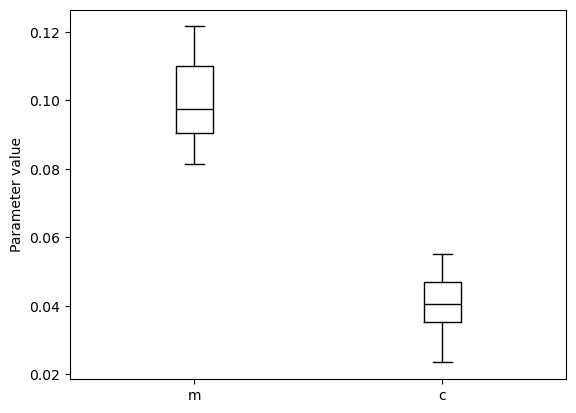

In [5]:
# Creating boxplot
m_vals = [data_dict[source]['m'] for source in data_dict.keys()]
c_vals = [data_dict[source]['c'] for source in data_dict.keys()]

boxp_data = {'m': m_vals, 'c': c_vals}

plt.boxplot(boxp_data.values(), labels=boxp_data.keys())

# Adding labels and title
plt.ylabel('Parameter value')

# Displaying the plot
plt.show()

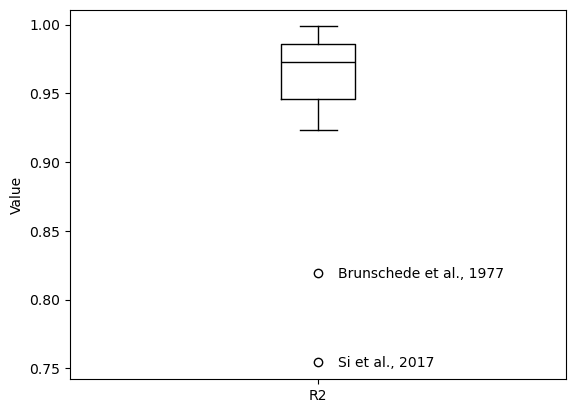

In [7]:
# Creating boxplot
R2_vals = [data_dict[source]['R2'] for source in data_dict.keys()]

boxp_data = {'R2': R2_vals}

boxplot = plt.boxplot(boxp_data.values(), labels=boxp_data.keys())

# Annotating outliers
outliers = [item.get_ydata() for item in boxplot['fliers']]
for i, outlier_list in enumerate(outliers):
    for outlier in outlier_list:
        index = boxp_data['R2'].index(outlier)
        plt.annotate(list(data_dict.keys())[index], xy=(i+1, outlier), xytext=(i+1.04, outlier * 0.996))


# Adding labels and title
plt.ylabel('Value')

# Displaying the plot
plt.show()

In [8]:
# Calculate parameters for whole set without outlier datasets

# Collated cleaned dataset
data_dict_woo = data_dict.copy()
del data_dict_woo['Brunschede et al., 1977'], data_dict_woo['Si et al., 2017']

woo_my_data = [growth_rate for source in data_dict_woo.keys() for growth_rate in data_dict_woo[source]['growth_rate_hr']]
woo_MRb_data = [growth_rate for source in data_dict_woo.keys() for growth_rate in data_dict_woo[source]['mass_fraction']]

# Linear fit of collated data
woo_parameters, woo_covariance = curve_fit(M_Rb_Linear, woo_my_data, woo_MRb_data)

# Standard error
woo_SE = np.sqrt(np.diag(woo_covariance))
woo_SE_m = woo_SE[0]
woo_SE_c = woo_SE[1]
    
# Fitted parameters
woo_m = woo_parameters[0]
woo_c = woo_parameters[1]

# Fitted curve data
woo_fit_my = np.linspace(0, max(M_Rb_data['growth_rate_hr']), 100)
woo_fit_MRb = M_Rb_Linear(woo_fit_my, woo_m, woo_c)

# R^2
woo_R2 = r2_score(woo_MRb_data, [M_Rb_Linear(my_val, woo_m, woo_c) for my_val in woo_my_data])

# Print parameters
print(f"Parameters collated:")
print(f"m = {woo_m:.4f}, Std. Err. = {woo_SE_m:.4f}")
print(f"c = {woo_c:.4f}, Std. Err. = {woo_SE_c:.4f}")
print(f"R2 value: {woo_R2:.4f}")

Parameters collated:
m = 0.0964, Std. Err. = 0.0019
c = 0.0445, Std. Err. = 0.0015
R2 value: 0.9387


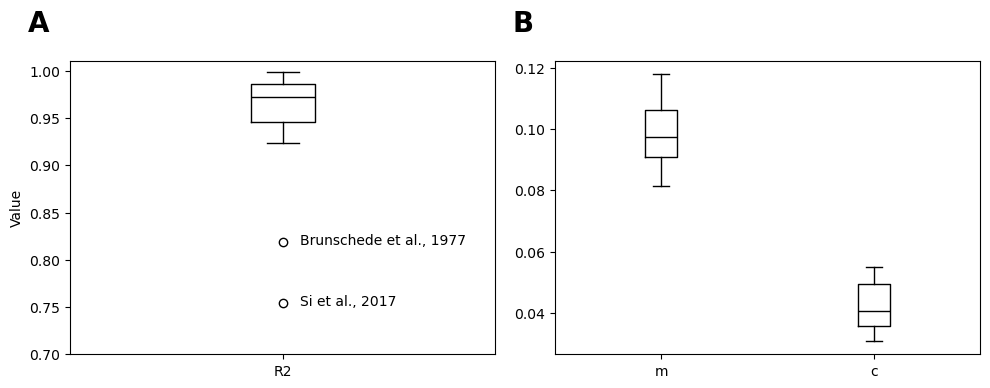

In [11]:
# Creating boxplot for R2 values
R2_vals = [data_dict[source]['R2'] for source in data_dict.keys()]
boxp_data_r2 = {'R2': R2_vals}

# Creating boxplot for m and c values
m_vals = [data_dict_woo[source]['m'] for source in data_dict_woo.keys()]
c_vals = [data_dict_woo[source]['c'] for source in data_dict_woo.keys()]
boxp_data_mc = {'m': m_vals, 'c': c_vals}

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Annotate figures
ax1.text(-0.1, 1.1, 'A', transform=ax1.transAxes, size=20, weight='bold')
ax2.text(-0.1, 1.1, 'B', transform=ax2.transAxes, size=20, weight='bold')

# Plotting boxplot for R2 values
boxplot_r2 = ax1.boxplot(boxp_data_r2.values(), labels=boxp_data_r2.keys())

# Annotating outliers for R2 values
outliers_r2 = [flier.get_ydata() for flier in boxplot_r2['fliers']]
for i, outlier_list in enumerate(outliers_r2):
    for outlier in outlier_list:
        index = boxp_data_r2['R2'].index(outlier)
        ax1.annotate(list(data_dict.keys())[index], xy=(i+1, outlier), xytext=(i+1.04, outlier * 0.996))

ax1.set_ylabel('Value')
ax1.set_ylim(0.7)

# Plotting boxplot for m and c values
ax2.boxplot(boxp_data_mc.values(), labels=boxp_data_mc.keys())

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()


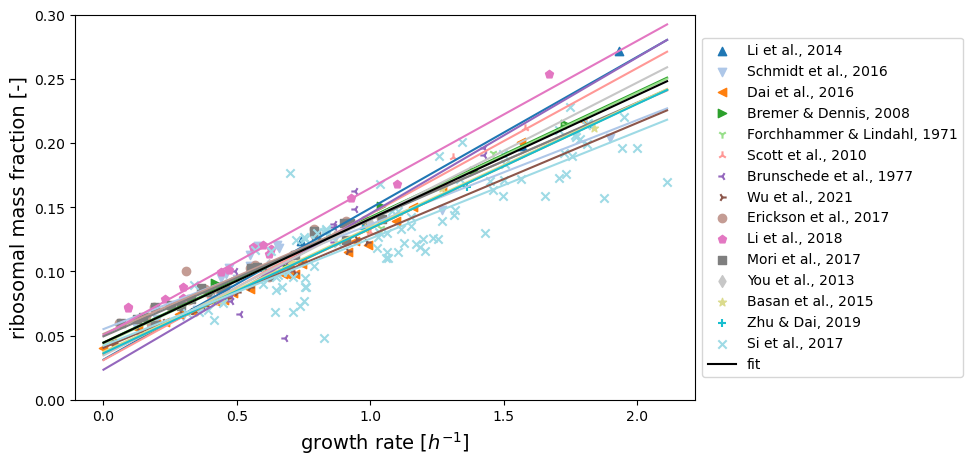

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))

colors = plt.cm.tab20(np.linspace(0, 1, len(data_dict.keys())))
markers = ['^', 'v', '<', '>', '1', '2', '3', '4', 'o', 'p', 's', 'd', '*', '+', 'x']

# Loop through sources
for i, source in enumerate(data_dict.keys()):
    # Plot data
    ax.scatter(data_dict[source]['growth_rate_hr'], data_dict[source]['mass_fraction'], label=source, color=colors[i], marker=markers[i])
    ax.plot(data_dict[source]['my_data'], data_dict[source]['fit_data'], '-', color=colors[i])

ax.plot(woo_fit_my, woo_fit_MRb, '-', color='black', label='fit')

# Create label
ax.set_ylabel(fr"ribosomal mass fraction [-]", fontsize=14) 
ax.set_xlabel(r"growth rate [$h^{-1}$]", fontsize=14)

# Create legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Create grid
#ax.grid(alpha=0.4)

# Set axis limits
ax.set_ylim(0, 0.3)

# Set x-axis ticks
# plt.xticks(np.arange(0, 10, 1.0))

# Save the figure
# plt.savefig(f"{param}_f_Rb_RFU_curves.svg")

plt.show()